# SI 370 - Clustering

![](resources/clustering/Slide01.png)

![](resources/clustering/Slide02.png)

![](resources/clustering/Slide03.png)

![](resources/clustering/Slide01.png)

![](resources/clustering/Slide04.png)

![](resources/clustering/Slide07.png)

![](resources/clustering/Slide09.png)

![](resources/clustering/Slide10.png)

![](resources/clustering/Slide11.png)

![](resources/clustering/Slide12.png)

![](resources/clustering/Slide13.png)

![](resources/clustering/Slide14.png)

![](resources/clustering/Slide15.png)

![](resources/clustering/Slide16.png)

![](resources/clustering/Slide17.png)

![](resources/clustering/Slide18.png)

![](resources/clustering/Slide19.png)

![](resources/clustering/Slide20.png)

![](resources/clustering/Slide21.png)

![](resources/clustering/Slide22.png)

![](resources/clustering/Slide23.png)

![](resources/clustering/Slide24.png)

![](resources/clustering/Slide25.png)

In [2]:
%matplotlib inline

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns

In [37]:
iris = sns.load_dataset("iris")

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
iris_sample = iris.sample(20)
iris_species = iris_sample['species']
iris_nospecies = iris_sample.drop('species',axis=1)

In [68]:
iris_sample.head()

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
93,5.0,2.3,3.3,1.0,versicolor
141,6.9,3.1,5.1,2.3,virginica
56,6.3,3.3,4.7,1.6,versicolor
110,6.5,3.2,5.1,2.0,virginica


In [69]:
iris_species.head()

78     versicolor
93     versicolor
141     virginica
56     versicolor
110     virginica
Name: species, dtype: object

In [70]:
iris_nospecies.head()

,sepal_length,sepal_width,petal_length,petal_width
78,6.0,2.9,4.5,1.5
93,5.0,2.3,3.3,1.0
141,6.9,3.1,5.1,2.3
56,6.3,3.3,4.7,1.6
110,6.5,3.2,5.1,2.0


In [71]:
model = AgglomerativeClustering(n_clusters=3)
model.fit_predict(iris_nospecies)

array([0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0])

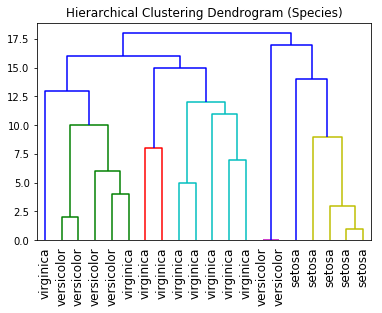

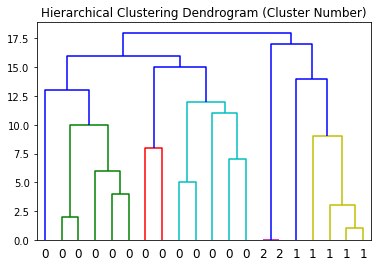

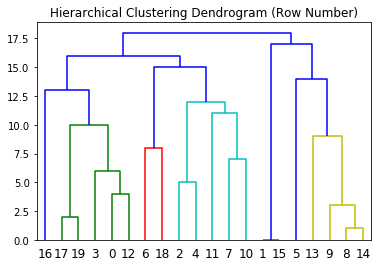

In [72]:
# Authors: Mathew Kallada & Chris Teplovs
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(n_clusters=3)
model = model.fit(iris_nospecies)

plt.title('Hierarchical Clustering Dendrogram (Species)')

plot_dendrogram(model,labels=iris_species.values)
plt.xticks(rotation=90)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (Cluster Number)')
plot_dendrogram(model,labels=model.labels_)
plt.xticks(rotation=0)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (Row Number)')
plot_dendrogram(model)
plt.xticks(rotation=0)
plt.show()

### Q1: Comment on the performance of the hierarchical clustering.  Does it get most of the clusters "right"?

Insert your answer here

![](resources/clustering/Slide26.png)

![](resources/clustering/Slide27.png)

![](resources/clustering/Slide28.png)

![](resources/clustering/Slide31.png)

![](resources/clustering/Slide32.png)

![](resources/clustering/Slide33.png)

![](resources/clustering/Slide34.png)

![](resources/clustering/Slide36.png)

![](resources/clustering/Slide37.png)

The following code is based on the code at https://www.datacamp.com/community/tutorials/k-means-clustering-python

In [93]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
# Read Titanic data (in a different format)
titanic_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
titanic = pd.read_csv(titanic_url)

In [141]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
print(titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [143]:

titanic.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [120]:
print("***** na in the data set*****")
print(titanic.isna().sum())

***** na in the data set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [121]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [122]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [144]:
titanic = titanic.drop(['PassengerId','Name','Ticket', 'Cabin','Embarked'], axis=1)

In [145]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [146]:
titanic.dropna(inplace=True)

In [147]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [148]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [149]:
labelEncoder = LabelEncoder()
labelEncoder.fit(titanic['Sex'])
titanic['Sex'] = labelEncoder.transform(titanic['Sex'])

In [150]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [167]:
X = np.array(titanic.drop(['Survived'], 1).astype(float))
y = np.array(titanic['Survived'])

In [153]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [166]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6190476190476191


### Q2: What does the above number mean?

Insert your answer here

For reference, here's the complete code block to run k-means clustering on a pandas dataframe:

In [174]:
X = np.array(titanic.drop(['Sex'], 1).astype(float))
y = np.array(titanic['Sex'])
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.34593837535014005
